### No regularization

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# สร้าง 1000 ข้อมํูล 5 กลุ่ม แต่ละกลุ่มมี 2 Features

In [4]:
X, y = make_blobs(n_samples=300, centers=5, n_features=2, cluster_std=1.1, random_state=1)

In [5]:
X

array([[ -3.9231849 ,  -3.95287286],
       [ -3.60334462,   0.86627928],
       [ -7.05019424,  -8.91739106],
       [ -1.95423679,   4.98988088],
       [-11.22873944,  -1.80166175],
       [ -0.73667815,   5.43070216],
       [ -3.24808509,   3.85157742],
       [ -8.20729668,  -3.58153568],
       [ -6.79770594,  -2.56341426],
       [ -3.11191883,   0.20637457],
       [ -1.52555651,   5.64892217],
       [ -2.36808118,   2.12818582],
       [ -1.2157191 ,   5.05942624],
       [ -1.90817401,   1.34119071],
       [ -6.25591457,  -3.56084197],
       [ -6.96267197,  -3.74201283],
       [ -1.00145734,   1.56068864],
       [ -1.31224905,   0.3875837 ],
       [ -9.24963568,  -4.30513031],
       [ -4.94549381,  -1.86151348],
       [ -6.68708093,  -3.91375204],
       [ -1.90412086,   4.18565599],
       [ -6.38169121,  -7.10149423],
       [ -2.01421883,   3.98403008],
       [ -0.72878319,   3.46102233],
       [ -6.52643818,  -1.31408795],
       [ -9.73077612,  -3.73133535],
 

In [6]:
X_df = pd.DataFrame(X, columns=['weight', 'height'])

In [7]:
y_df = pd.DataFrame(y, columns=['class'])

In [8]:
y_df

,class
0,3
1,4
2,2
3,0
4,1
...,...
295,3
296,1
297,2
298,2


In [9]:
X_df

,weight,height
0,-3.923185,-3.952873
1,-3.603345,0.866279
2,-7.050194,-8.917391
3,-1.954237,4.989881
4,-11.228739,-1.801662
...,...,...
295,-7.711983,-3.004767
296,-9.041938,-3.127896
297,-6.380898,-8.813013
298,-9.821967,-10.478808


In [10]:
df = pd.concat([X_df, y_df], axis=1)

In [11]:
df

,weight,height,class
0,-3.923185,-3.952873,3
1,-3.603345,0.866279,4
2,-7.050194,-8.917391,2
3,-1.954237,4.989881,0
4,-11.228739,-1.801662,1
...,...,...,...
295,-7.711983,-3.004767,3
296,-9.041938,-3.127896,1
297,-6.380898,-8.813013,2
298,-9.821967,-10.478808,2


In [12]:
target_map = { 0: 'horse', 1:'bird', 2: 'fish', 3: 'cat', 4: 'dog'}

In [13]:
df['class'] = df['class'].map(target_map)

In [14]:
df.sample(5, random_state=100)

,weight,height,class
222,-0.258428,6.570302,horse
139,-6.384489,-8.640717,fish
216,-2.684818,0.874990,dog
201,-10.338841,-6.631670,bird
249,-4.667814,-2.437065,cat


In [15]:
class_names, y = np.unique(df['class'], return_inverse=True)

In [16]:
class_names

array(['bird', 'cat', 'dog', 'fish', 'horse'], dtype=object)

In [17]:
X = df.drop('class', axis=1)

In [18]:
X.head()

,weight,height
0,-3.923185,-3.952873
1,-3.603345,0.866279
2,-7.050194,-8.917391
3,-1.954237,4.989881
4,-11.228739,-1.801662


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc = StandardScaler()

In [21]:
X_sc = sc.fit_transform(X)

In [22]:
X_sc[:5]

array([[ 0.43933399, -0.46043393],
       [ 0.53640371,  0.62434055],
       [-0.50969572, -1.5779298 ],
       [ 1.03689864,  1.552549  ],
       [-1.77786063,  0.02379625]])

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [25]:
X_train.shape, X_test.shape

((225, 2), (75, 2))

In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [35]:
model = Sequential()

In [36]:
model.add(Dense(units=256, activation='relu', input_shape=(2,)))

In [37]:
model.add(Dense(units=128, activation='relu')) # use softmax for multi-class classification

In [38]:
model.add(Dense(units=64, activation='relu'))

In [39]:
model.add(Dense(units=5, activation='softmax'))

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               768       
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 325       
Total params: 42,245
Trainable params: 42,245
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 2),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_5_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_5',
    'trainable': True,
    'batch_input_shape': (None, 2),
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_6',
    'trainable': True,
    'dtype': 'float32',
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_

In [42]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=256, verbose=1, validation_data=(X_test, y_test))

Epoch 1/1000
1/1 [==============================] - 1s 897ms/step - loss: 1.8840 - accuracy: 0.0178 - val_loss: 1.6356 - val_accuracy: 0.2267
Epoch 2/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.6144 - accuracy: 0.2622 - val_loss: 1.4438 - val_accuracy: 0.5600
Epoch 3/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.4235 - accuracy: 0.5689 - val_loss: 1.3022 - val_accuracy: 0.5200
Epoch 4/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.2846 - accuracy: 0.5600 - val_loss: 1.1916 - val_accuracy: 0.5200
Epoch 5/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.1774 - accuracy: 0.5244 - val_loss: 1.1036 - val_accuracy: 0.5067
Epoch 6/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.0911 - accuracy: 0.5289 - val_loss: 1.0320 - val_accuracy: 0.6267
Epoch 7/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.0237 - accuracy: 0.5778 - val_loss: 0.9726 - val_accuracy: 0.6133
Epoch 8/1000

In [46]:
score = model.evaluate(X_test, y_test, verbose=0)

In [47]:
print("Test loss", score[0])
print("Test accuracy", score[1])

Test loss 0.753125011920929
Test accuracy 0.9200000166893005


In [48]:
df_hist = pd.DataFrame(history.history)

Text(0.5, 1.0, 'Loss')

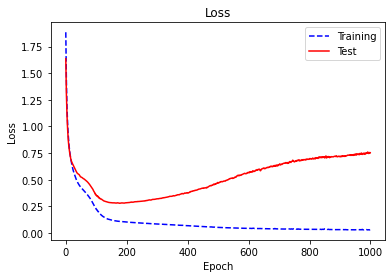

In [49]:
df_hist['loss'].plot(style='b--', label='Training')
df_hist['val_loss'].plot(style='r-', label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

Text(0.5, 1.0, 'model accuracy')

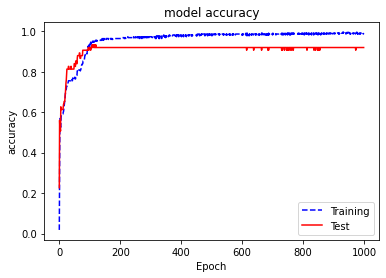

In [50]:
df_hist['accuracy'].plot(style='b--', label='Training')
df_hist['val_accuracy'].plot(style='r-', label='Test')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title('model accuracy')

In [54]:
y_pred = model.predict(X_test)

In [55]:
y_pred[:4].round(3)

array([[0.   , 0.   , 0.   , 0.   , 1.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   ],
       [0.002, 0.998, 0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   ]], dtype=float32)

In [56]:
y_pred_cat = np.argmax(y_pred, axis=1)

In [57]:
y_pred_cat[:4]

array([4, 1, 1, 2], dtype=int64)

In [58]:
class_names[y_pred_cat[:4]]

array(['horse', 'cat', 'cat', 'dog'], dtype=object)

In [59]:
class Onehot2Int(object):
	def __init__(self, model) -> None:
		self.model = model	
	def predict(self, X):
		y_pred = self.model.predict(X)
		return np.argmax(y_pred, axis=1)

model_no_ohe = Onehot2Int(model)

In [60]:
from mlxtend.plotting import plot_decision_regions

c:\Users\LENOVO LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\plotting\decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


Text(0, 0.5, 'height')

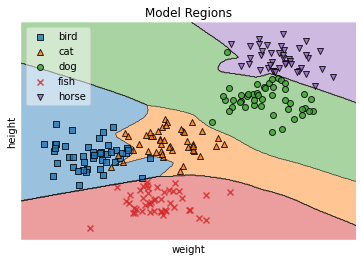

In [62]:
ax = plot_decision_regions(np.array(X_train), np.array(y_train), clf=model_no_ohe)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=.5)
plt.title('Model Regions')
plt.xticks([])
plt.yticks([])
plt.xlabel('weight')
plt.ylabel('height')

Text(0, 0.5, 'height')

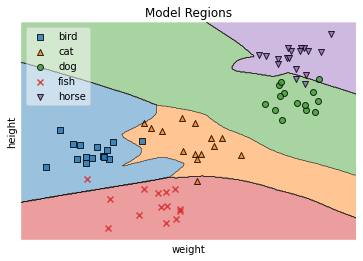

In [63]:
ax = plot_decision_regions(np.array(X_test), np.array(y_test), clf=model_no_ohe)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=.5)
plt.title('Model Regions')
plt.xticks([])
plt.yticks([])
plt.xlabel('weight')
plt.ylabel('height')